In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
data = {
    'Name': ['Rich', 'Michael', 'Mohan', 'Small', 'Kory', 'Gastan', 'David', 'Andrea', 'Brad', 'Angelina', 'Donald', 'Tom', 'Arnold', 'Jared', 'Star', 'Rambo', 'Dipika', 'Pripanka', 'Nick', 'Alia', 'Sid', 'Abdul'],
    'Age': [27,29,29,28,42,39,41,38,36,35,37,26,27,28,29,32,40,41,43,39,41,39],
    'Income($)': [70000,90000,61000,60000,150000,155000,160000,162000,156000,130000,137000,45000,48000,51000,49500,53000,65000,63000,64000,80000,82000,58000]
}
df = pd.DataFrame(data)

In [24]:
df

,Name,Age,Income($),cluster
0,Rich,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Small,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gastan,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


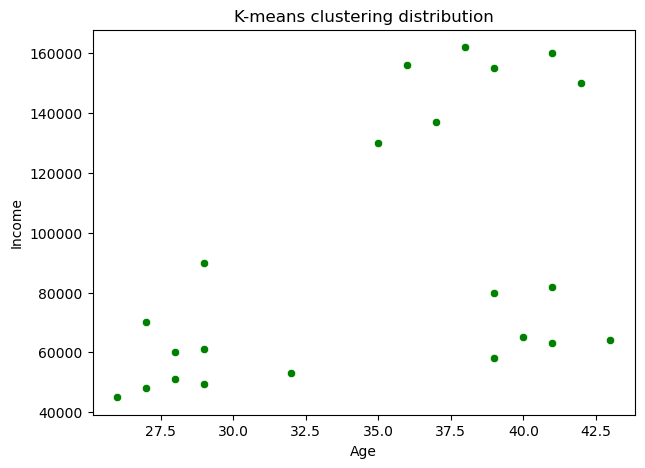

In [6]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Age', y='Income($)', data=df, color='green')

plt.xlabel('Age')
plt.ylabel('Income')
plt.title('K-means clustering distribution')

plt.show()

In [7]:
kn = KMeans(n_clusters=3)
kn

KMeans(n_clusters=3)

In [8]:
y_predicted = kn.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [9]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rich,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Small,28,60000,0
4,Kory,42,150000,1


In [10]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

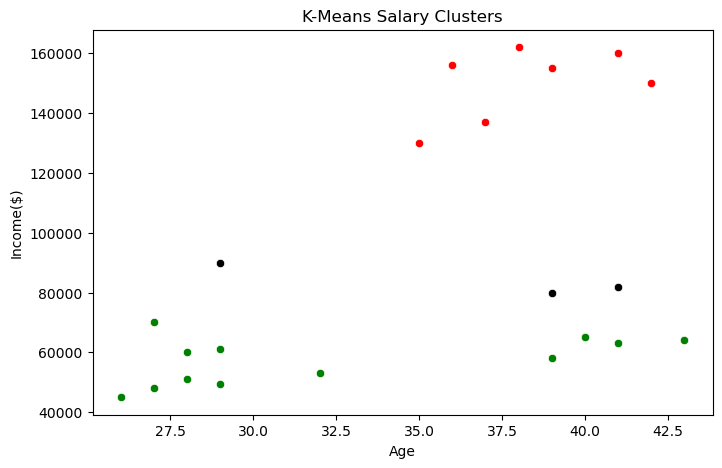

In [11]:
plt.figure(figsize=(8,5))

sns.scatterplot(x='Age', y='Income($)', data=df1, color='green')
sns.scatterplot(x='Age', y='Income($)', data=df2, color='red')
sns.scatterplot(x='Age', y='Income($)', data=df3, color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('K-Means Salary Clusters')

plt.show()

In [12]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])

MinMaxScaler()

In [13]:
df['Income($)'] = scaler.transform(df[['Income($)']])

In [14]:
scaler.fit(df[['Age']])

MinMaxScaler()

In [15]:
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rich,0.058824,0.213675,0
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Small,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gastan,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [16]:
kn = KMeans(n_clusters=3)
y_predicted = kn.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [17]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rich,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Small,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gastan,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [18]:
kn.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [19]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

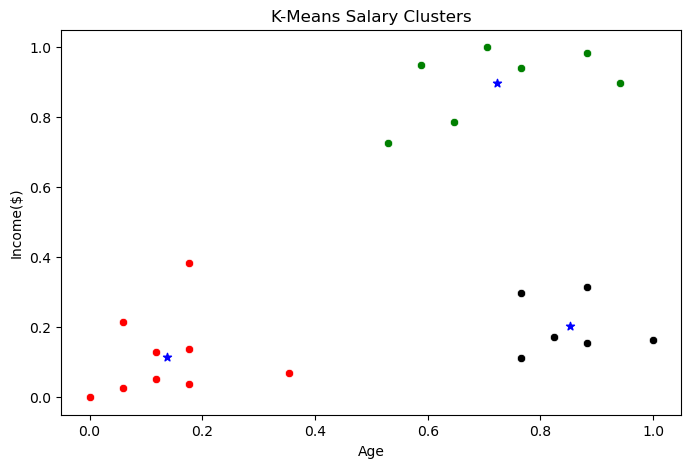

In [20]:
plt.figure(figsize=(8,5))

sns.scatterplot(x='Age', y='Income($)', data=df1, color='green')
sns.scatterplot(x='Age', y='Income($)', data=df2, color='red')
sns.scatterplot(x='Age', y='Income($)', data=df3, color='black')

plt.scatter(kn.cluster_centers_[:, 0], kn.cluster_centers_[:, 1], color='blue', marker='*', label='centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('K-Means Salary Clusters')

plt.show()

In [21]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [22]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3625079900797329,
 0.2829404587160481,
 0.23844880713540698,
 0.18752738899206242,
 0.14090581089405507,
 0.11377044584834492]

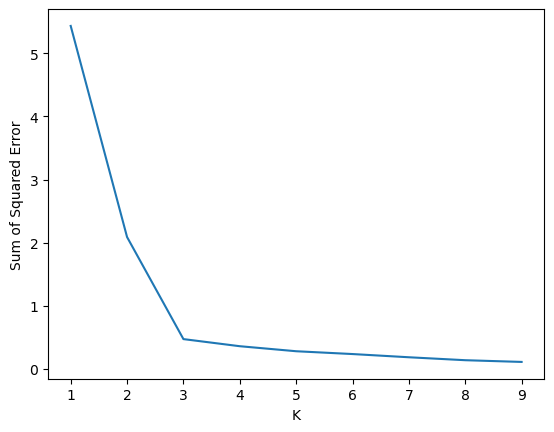

In [23]:
plt.plot(k_rng, sse)

plt.xlabel('K')
plt.ylabel('Sum of Squared Error')

plt.show()